My aim is to use data of test scores for students versus hours they have studied to create a predictive model.

I import libraries and modules necessary for linear regression- most importantly ols from statsmodel .

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import scipy.stats as stats

In [2]:
# Import the statsmodel module.
import statsmodels.api as sm

# Import the ols function from statsmodels.
from statsmodels.formula.api import ols

I read in the data given use the read excel function of pandas library.

In [3]:
data = pd.read_excel("C:\\Users\\BCCL\\Desktop\\hrs.xlsx" )
data

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


I check for null values and generate a new dataframe with no null and duplicate values. It turns out to be unnecessary as data is very clean already.

In [4]:
data = data.dropna(subset = ['Hours', 'Scores' ], axis = 0)
data

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


Text(0.5, 1.0, 'Student Data of Marks and Hours')

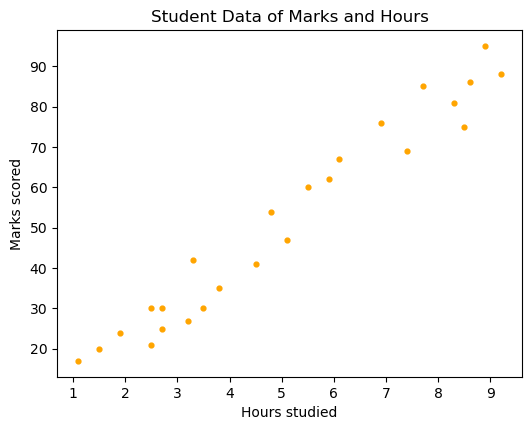

In [5]:
plt.figure(figsize=(6,4.5))
plt.scatter(data['Hours'], data['Scores'], color='orange', label='Data points', s= 12)
plt.xlabel('Hours studied')
plt.ylabel('Marks scored')
plt.title('Student Data of Marks and Hours')

As x variable increases the y value also increases so there is a strong linear relationship.

I define the linear regression relationship and fit the model. There is very little data hence I dont want to split into train and test data sets. I use all the points.

In [6]:

ols_formula = 'Scores ~ Hours'

# Create an OLS model.
OLS = ols(formula = ols_formula, data = data)

# Fit the model.
model = OLS.fit()



Model is created. Now I use the params attributes of the models to get the slope and intercept of regression line. This is useful for predicting other values later on.

In [7]:
intercept, slope = model.params

x_line = np.linspace(data['Hours'].min(), data['Hours'].max()+2, 100)
y_line = intercept + slope * x_line

I plot the regression line in blue.

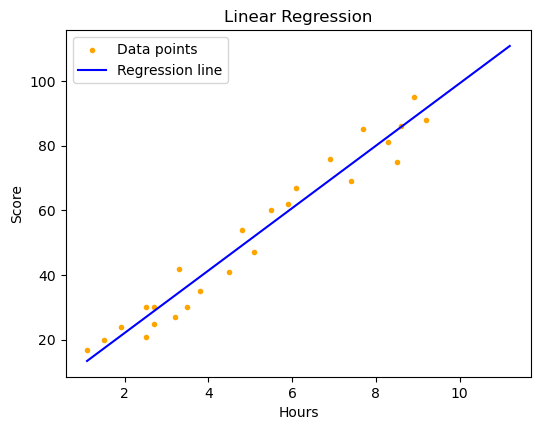

In [8]:
plt.figure(figsize=(6,4.5))
plt.scatter(data['Hours'], data['Scores'], color='orange', label='Data points', s= 9)
plt.plot(x_line, y_line, color='blue', label='Regression line')
plt.xlabel('Hours')
plt.ylabel('Score')
plt.title('Linear Regression')
plt.legend()

Now we move on to the evaluation part of the regression model. How well does the line explain the variability in points (R-squared), what is the statistical significance of parameter values obtained are all analyzed using model_results.

In [14]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Scores   R-squared:                       0.957
Model:                            OLS   Adj. R-squared:                  0.955
Method:                 Least Squares   F-statistic:                     508.5
Date:                Thu, 14 Mar 2024   Prob (F-statistic):           3.48e-17
Time:                        02:12:02   Log-Likelihood:                -76.468
No. Observations:                  25   AIC:                             156.9
Df Residuals:                      23   BIC:                             159.4
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.8727      2.409      1.193      0.245      -2.110       7.855
Hours          9.6367      0.427     22.550      0.000       8.753      10.521
==============================================================================
Omnibus:                        6.236   Durbin-Watson:                   1.640
Prob(Omnibus):                  0.044   Jarque-Bera (JB):                1.872
Skew:                          -0.129   Prob(JB):                        0.392
Kurtosis:                       1.685   Cond. No.                         13.0
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

The R-squared statistic is the primary metric of interest. Its value is 0.957 which is very close to 1. The p value for the slope is also 0 which is perfect- indicating a very strong linear relationship. Our model performs very well.

We know want to predict the value of marks for number of hours studied using our linear regression model. 
For further clarity, we want to make an offset to the x axis for the requested value of x=9.25 .

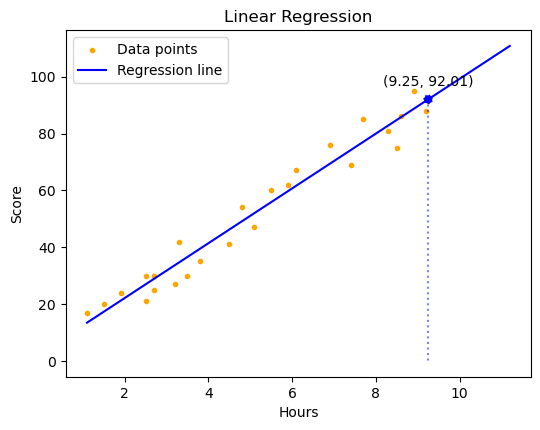

In [16]:
plt.figure(figsize=(6, 4.5))
plt.scatter(data['Hours'], data['Scores'], color='orange', label='Data points', s= 9)
plt.plot(x_line, y_line, color='blue', label='Regression line')
plt.xlabel('Hours')
plt.ylabel('Score')
plt.title('Linear Regression')
plt.legend()
x_value = 9.25

# Predict the y value
y_value = intercept + slope * x_value

# Plot the predicted point
plt.scatter(x_value, y_value, color='blue', label='Predicted value', linestyle='dotted')
plt.annotate(f'({x_value}, {y_value:.2f})', (x_value, y_value), textcoords="offset points", xytext=(0,10), ha='center')
plt.plot([x_value, x_value], [y_value, 0], color='blue', linestyle='dotted', alpha=0.5)

# Show plot
plt.show()

We obtain a predicted score of 92.01 for x = 9.25 hours using our model. This is the final answer.

We can make a general function to get y values based on our regression model applied to x values.

In [17]:
def predict(x):
    print('Predicted Marks Scored:', '{:.2f}'.format(intercept + slope * x))
    


In [18]:
predict(9.25)

Predicted Marks Scored: 92.01


Thus function can be used for any value of hours studied to get predicted value of score.

Further analysis:

When we applied linear regression model to data, it was based on the implicit assumption that data follows certain properties. Now that we have a good model, our job is to check if the assumptions actually hold true or not as a final step. This is done in 2 ways-

1.Q-Q Plots(Quantile-Quantile Plots):

In [95]:
data['pred'] = intercept + slope * data['Hours']
data

,Hours,Scores,pred
0,2.5,21,26.964327
1,5.1,47,52.019653
2,3.2,27,33.709992
3,8.5,75,84.784311
4,3.5,30,36.600991
5,1.5,20,17.327663
6,9.2,88,91.529976
7,5.5,60,55.874319
8,8.3,81,82.856978
9,2.7,25,28.891660


Q-Q plots can be used to visually assess if your data follows a specific distribution. For linear regression assumptions, you would typically compare the quantiles of your residuals (observed data minus predicted values) against the quantiles of a normal distribution. If the points fall approximately along a straight line, it suggests that the residuals are normally distributed, which is a key assumption of linear regression.

In [96]:
observed_data= np.array(data['Scores'].tolist())
predicted_values= np.array(data['pred'].tolist())

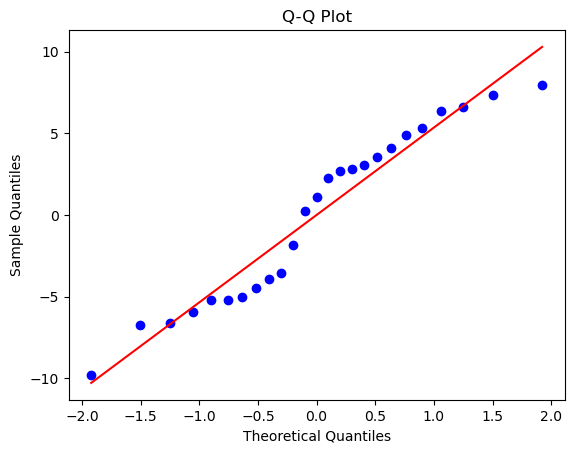

In [97]:
residuals = observed_data - predicted_values

# Create Q-Q plot
stats.probplot(residuals, dist="norm", plot=plt)
plt.xlabel('Theoretical Quantiles')
plt.ylabel('Sample Quantiles')
plt.title('Q-Q Plot')
plt.show()


Points do not deviate much from the line hence normally distributed residuals assumption of regression is validated.

2.Plotting Residuals: 

Another way to check the linear regression assumption is to plot the residuals against the predicted values or any independent variables. The residuals should be randomly distributed around zero, with no clear pattern or trend. If there is a pattern (e.g., the residuals form a curve or have a systematic increase or decrease), it suggests that the linear regression assumption may not hold.

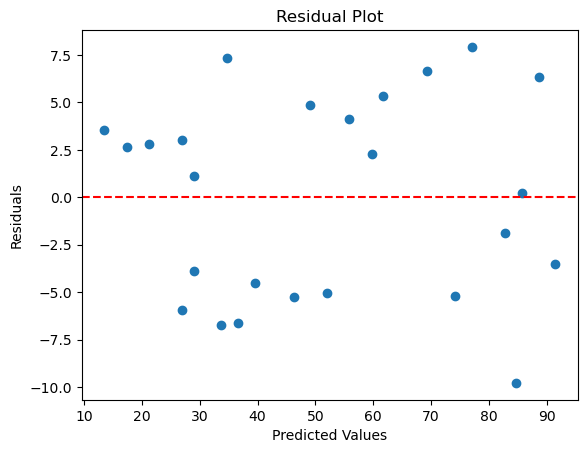

In [98]:
plt.scatter(predicted_values, residuals)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.show()


No regular pattern observed- hence linearity assumption is validated.

Now we have a good model and we have cross checked data as well for all assumptions completing our analysis.